<a href="https://colab.research.google.com/github/okutkarsh/DataMining/blob/main/Data_Mining_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install idx2numpy
import idx2numpy
import seaborn as sns

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=7a28dc964f3045997adeac78dfad0f48a5794dc130f1c5088ed66cc1f022d35b
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


In [ ]:
#Downloading MNIST dataset
!wget -O 'train-images-idx3-ubyte' http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget -O 'train-labels-idx1-ubyte' http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget -O 't10k-images-idx3-ubyte' http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget -O 't10k-labels-idx1-ubyte' http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2024-04-13 16:14:03--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.04s   

2024-04-13 16:14:03 (238 MB/s) - ‘train-images-idx3-ubyte’ saved [9912422/9912422]

--2024-04-13 16:14:03--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte’

train-labels-idx1-u 100%[===================>]

Extract Training data

In [ ]:
import gzip
import numpy as np

# Function to decompress and load the dataset
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        return idx2numpy.convert_from_file(f)

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        return idx2numpy.convert_from_file(f)

X_train_3D = load_mnist_images('/content/train-images-idx3-ubyte')
X_train = X_train_3D.reshape(60000, 784)  # Flatten the images

y_train = load_mnist_labels('/content/train-labels-idx1-ubyte');

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
X_train.shape


(60000, 784)

In [ ]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test_3D = load_mnist_images('/content/t10k-images-idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = load_mnist_labels('/content/t10k-labels-idx1-ubyte')

In [ ]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
y_test


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_test.shape

(10000,)

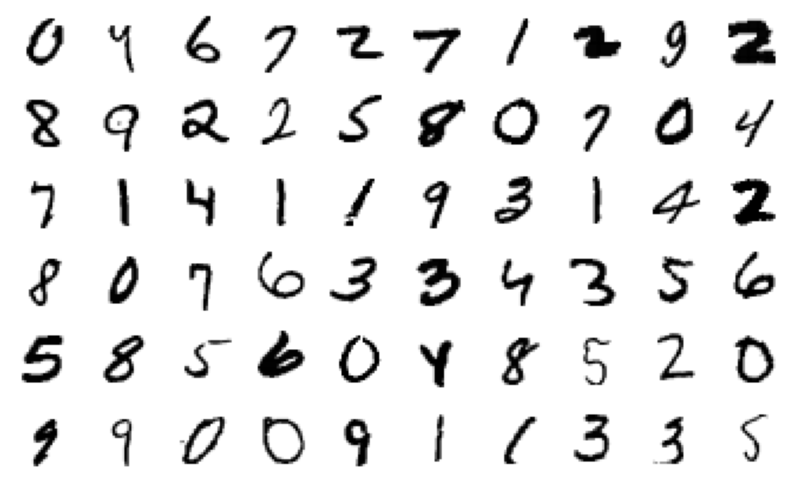

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from random import randrange
fig, axs = plt.subplots(6, 10, figsize=(10, 6)) # 6 rows of 10 images

for ax in axs.flat:
    i = randrange(X_train.shape[0])
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray_r')
    ax.set_axis_off()


In [ ]:
#Importing necessary metrics
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Decision Tree

In [ ]:
from sklearn import tree

# Initialize a Decision Tree classifier with a specific random state for reproducibility
dt_clf = tree.DecisionTreeClassifier(random_state=42)
y_train_pred = cross_val_predict(dt_clf, X_train, y_train, cv=5)   # 'cv=5' specifies 5-fold cross-validation
# Fit the Decision Tree classifier to the training data.
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# Evaluate the accuracy of the Decision Tree classifier using 5-fold cross-validation.
# This will return an array of accuracy scores (one for each fold).
cross_val_acc=cross_val_score(dt_clf, X_train, y_train, cv=5, scoring="accuracy")
# Calculate the mean of the cross-validation accuracy scores to get an overall idea of the model's accuracy.
mean_cross_val_acc = np.mean(cross_val_acc)
print("Mean Cross-validation Accuracy for Decision Tree Classifier:", mean_cross_val_acc)

Mean Cross-validation Accuracy for Decision Tree Classifier: 0.8664666666666665


Plot confusion matrix for cross validation prediction & actual labels



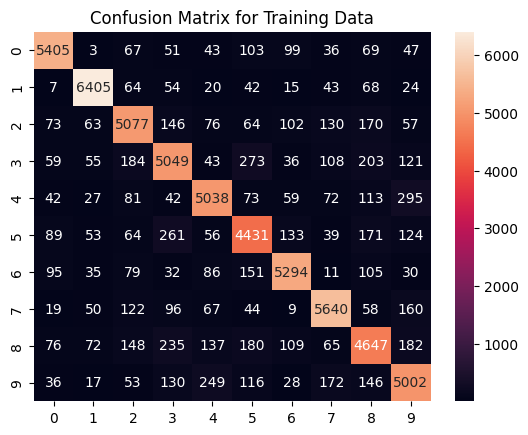

In [ ]:
# This matrix will show how well the model is predicting each class.
confusionMatrix = confusion_matrix(y_train, y_train_pred)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Training Data');

Plot Confusion Matrix against Test data



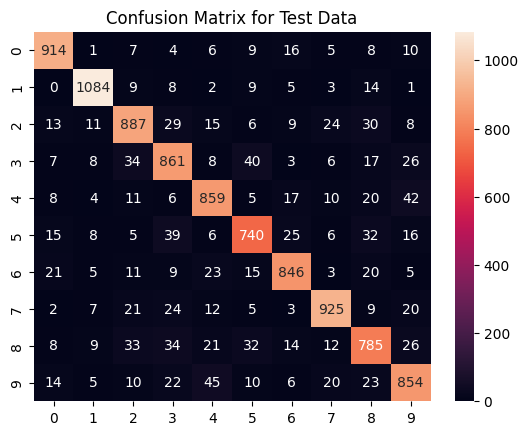

In [ ]:
# Use the trained Decision Tree classifier to predict the labels for the test set.
y_test_pred_dt = dt_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_dt)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');

Evaluation of classifier with different metrics

In [ ]:
# This report includes key metrics such as precision, recall, f1-score and support for each class
report = classification_report(y_test, y_test_pred_dt)
print("Classification Report for Decision Tree Classifier:")
print(report)

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.86      0.87      0.87       982
           5       0.85      0.83      0.84       892
           6       0.90      0.88      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.82      0.81      0.81       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



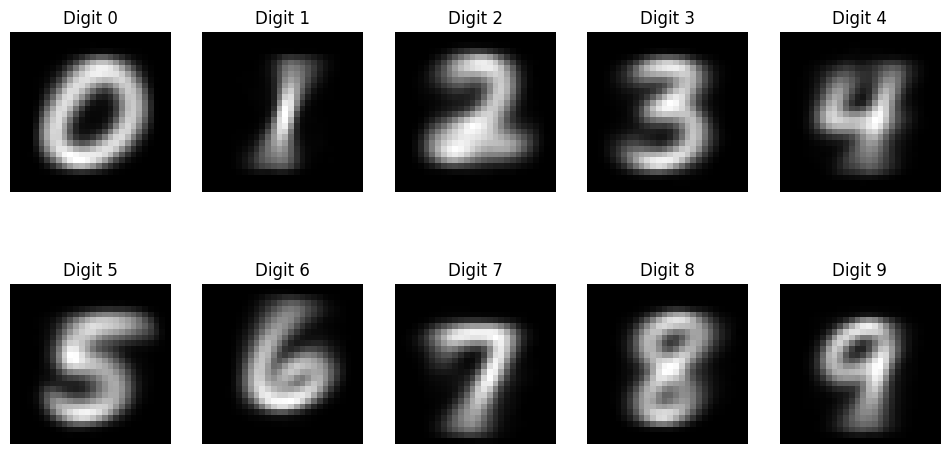

In [ ]:
# Get the mean image for each digit class
mean_images = []
for digit in range(10):
    # Filter out the images corresponding to the current digit
    digit_images = X_test[y_test_pred_dt == digit]
    mean_image = np.mean(digit_images, axis=0)
    # Reshape the mean image back to its original dimensions
    mean_image = mean_image.reshape(28, 28)
    mean_images.append(mean_image)

# Plot the mean images for each digit class
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(mean_images[i], cmap='gray')
    ax.set_title(f"Digit {i}")
    ax.axis('off')

plt.show()

In [ ]:
# Define the hyperparameters you want to tune and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 10,20,30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

dt_clf_grid = tree.DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_clf_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose =5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_dt_clf = grid_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best score found
print("Best Cross Validation Accuracy for Decision Tree Classifier after using GridSearchCV:", grid_search.best_score_)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross Validation Accuracy for Decision Tree Classifier after using GridSearchCV: 0.87285


Accuracy on test dataset for Decision Tree Classifier after using GridSearchCV:
0.8867


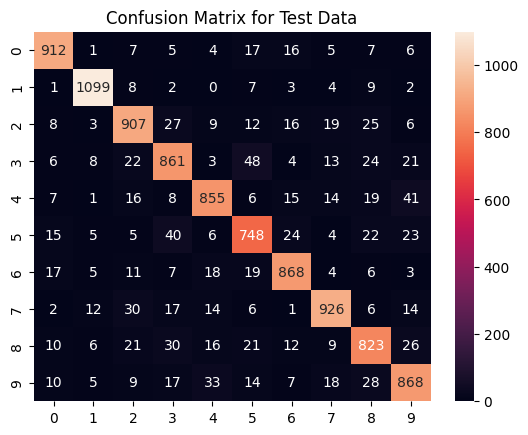

In [ ]:
# Fit the best Decision Tree classifier (obtained from GridSearchCV) on the training data.
best_dt_clf.fit(X_train,y_train)
# Use the trained model to predict the labels of the test set.
y_test_pred_dt_grid = best_dt_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_dt_grid)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');
print("Accuracy on test dataset for Decision Tree Classifier after using GridSearchCV:")
print(accuracy_score( y_test, y_test_pred_dt_grid))

In [ ]:

# Define the hyperparameters you want to tune and their possible values
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

dt_clf_rand = tree.DecisionTreeClassifier(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(dt_clf_rand, param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=5)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best estimator from random search
best_dt_clf = random_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Cross Validation Accuracy for Decision Tree Classifier after using RandomizedSearchCV:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'entropy'}
Best Score: 0.8724000000000001
Mean Cross-validation Accuracy for randomsearchCV in Decision Tree Classifier: 0.8724000000000001


Accuracy for test dataset by using randomsearchCV in decision tree 
0.8854


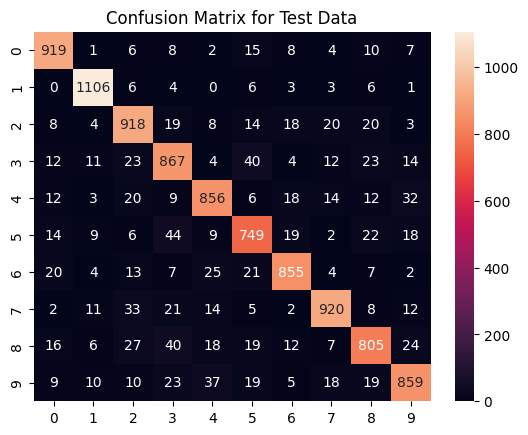

In [ ]:
# Fit the best Decision Tree classifier (obtained from RandomizedSearchCV) on the training data.
best_dt_clf.fit(X_train, y_train)
# Use the trained model to predict the labels of the test set.
y_test_pred_dt_rand = best_dt_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_dt_rand)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');
print("Accuracy on test dataset for Decision Tree Classifier after using RandomizedSearchCV:")
print(accuracy_score( y_test, y_test_pred_dt_rand))

#Random Forest classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize a Random Forest classifier with a specific random state for reproducibility
rf_clf = RandomForestClassifier(random_state=42)
y_train_pred = cross_val_predict(rf_clf, X_train, y_train, cv=5)      # 'cv=5' specifies 5-fold cross-validation
# Fit the Random Forest classifier to the training data.
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Evaluate the accuracy of the Random Forest classifier using 5-fold cross-validation.
# This will return an array of accuracy scores (one for each fold).
cross_val_acc=cross_val_score(rf_clf, X_train, y_train, cv=5, scoring="accuracy")
# Calculate the mean of the cross-validation accuracy scores to get an overall idea of the model's accuracy.
mean_cross_val_acc = np.mean(cross_val_acc)
print("Mean Cross-validation Accuracy for Random Forest Classifier:", mean_cross_val_acc)

Mean Cross-validation Accuracy for Random Forest Classifier: 0.96645


Plot confusion matrix for cross validation prediction & actual labels

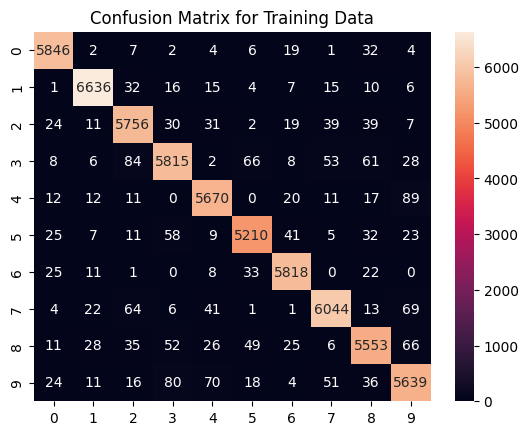

In [ ]:
# This matrix will show how well the model is predicting each class.
confusionMatrix = confusion_matrix(y_train, y_train_pred)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Training Data');


Plot Confusion Matrix against Test data



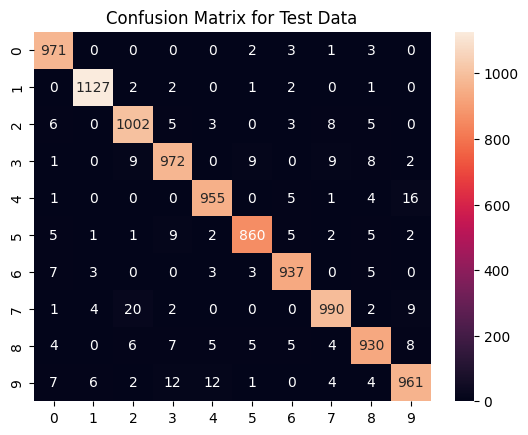

In [ ]:
# Use the trained Random Forest classifier to predict the labels for the test set.
y_test_pred_rf = rf_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_rf)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');

In [ ]:
report = classification_report(y_test, y_test_pred_rf)  # This report includes key metrics such as precision, recall, f1-score and support for each class
print("Classification Report for Random Forest Classifier:")
print(report)

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



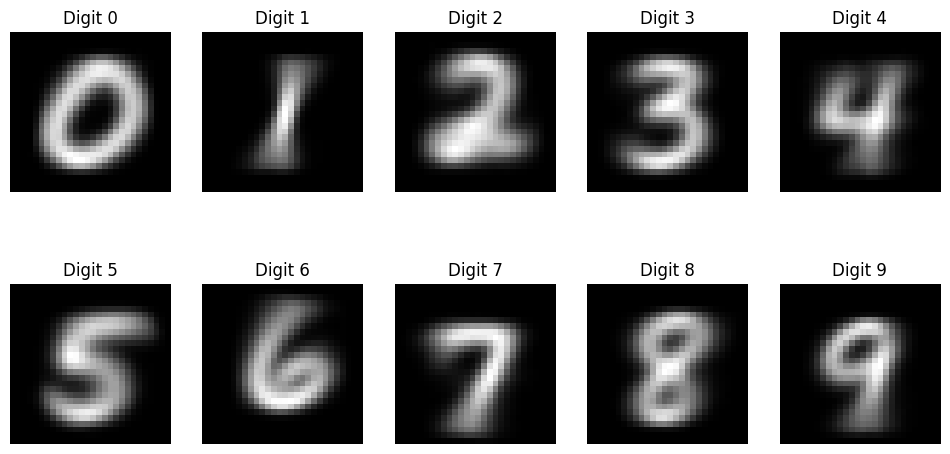

In [ ]:
# Get the mean image for each digit class
mean_images = []
for digit in range(10):
    # Filter out the images corresponding to the current digit
    digit_images = X_test[y_test_pred_rf == digit]
    mean_image = np.mean(digit_images, axis=0)
    # Reshape the mean image back to its original dimensions
    mean_image = mean_image.reshape(28, 28)
    mean_images.append(mean_image)

# Plot the mean images for each digit class
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(mean_images[i], cmap='gray')
    ax.set_title(f"Digit {i}")
    ax.axis('off')

plt.show()

In [ ]:
# Define the Random Forest classifier
rf_clf_grid = RandomForestClassifier(random_state=42)

# Define the hyperparameters you want to tune and their possible values
param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
# Create the GridSearchCV object
grid_search = GridSearchCV(rf_clf_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_rf_clf = grid_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best score found
print("Best Cross Validation Accuracy for Random Forest Classifier after using GridSearchCV:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross Validation Accuracy for Random Forest Classifier after using GridSearchCV: 0.9674833333333334


Accuracy on test dataset for Random Forest Classifier after using GridSearchCV:
0.9706


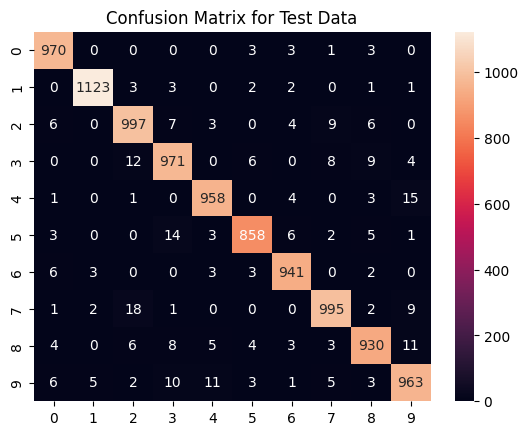

In [ ]:
# Fit the best Random Forest classifier (obtained from GridSearchCV) on the training data.
best_rf_clf.fit(X_train, y_train)
# Use the trained model to predict the labels of the test set.
y_test_pred_rf_grid = best_rf_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_rf_grid)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');
print("Accuracy on test dataset for Random Forest Classifier after using GridSearchCV:")
print(accuracy_score( y_test, y_test_pred_rf_grid))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Define the Random Forest classifier
rf_clf_rand = RandomForestClassifier(random_state=42)

# Define the hyperparameters you want to tune and their possible values
param_dist = {
    'n_estimators': [100,150,200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_clf_rand, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best estimator from random search
best_rf_clf = random_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Cross Validation Accuracy for Random Forest Classifier after using RandomizedSearchCV:", random_search.best_score_)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best Cross Validation Accuracy for Random Forest Classifier after using RandomizedSearchCV: 0.9662


Accuracy on test dataset for Random Forest Classifier after using RandomizedSearchCV:
0.97


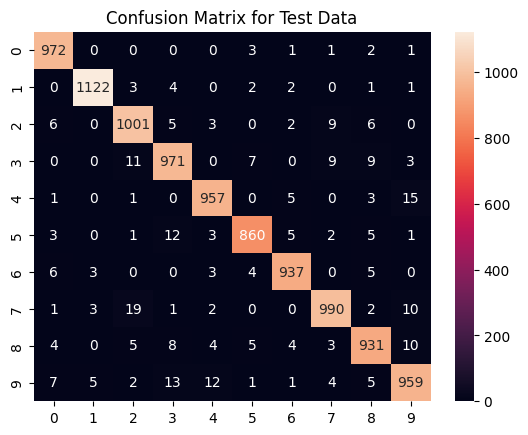

In [ ]:
# Fit the best Random Forest classifier (obtained from RandomizedSearchCV) on the training data.
best_rf_clf.fit(X_train, y_train)
# Use the trained model to predict the labels of the test set.
y_test_pred_rf_rand = best_rf_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_rf_rand)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');
print("Accuracy on test dataset for Random Forest Classifier after using RandomizedSearchCV:")
print(accuracy_score( y_test, y_test_pred_rf_rand))

# KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize a KNN classifier with a specific random state for reproducibility
np.random.seed(42)
knn_clf = KNeighborsClassifier()
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=5)  # 'cv=5' specifies 5-fold cross-validation
# Fit the KNN classifier to the training data.
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Evaluate the accuracy of the KNN classifier using 5-fold cross-validation.
# This will return an array of accuracy scores (one for each fold).
cross_val_acc=cross_val_score(knn_clf, X_train, y_train, cv=5, scoring="accuracy")
# Calculate the mean of the cross-validation accuracy scores to get an overall idea of the model's accuracy.
mean_cross_val_acc = np.mean(cross_val_acc)
print("Mean Cross-validation Accuracy for KNN Classifier:", mean_cross_val_acc)

Mean Cross-validation Accuracy for KNN Classifier: 0.9692833333333335


Create a confusion matrix for cross validation prediction & actual labels





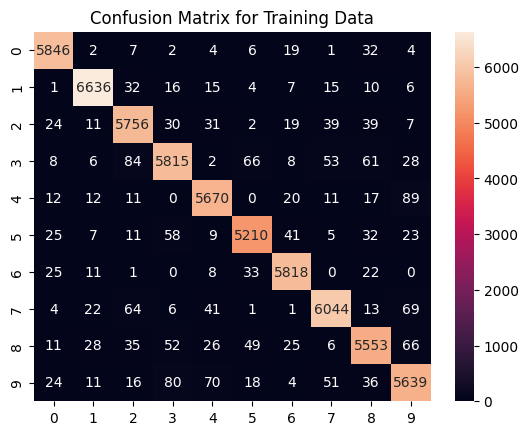

In [ ]:
# This matrix will show how well the model is predicting each class.
confusionMatrix = confusion_matrix(y_train, y_train_pred)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Training Data');

Plot Confusion Matrix against Test data



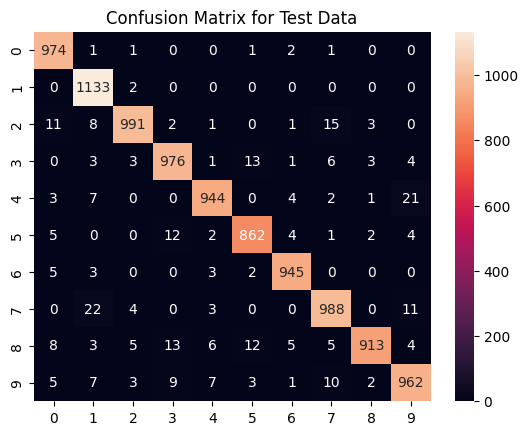

In [ ]:
# Use the trained KNN classifier to predict the labels for the test set.
y_test_pred_knn = knn_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_knn)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');


In [ ]:
report = classification_report(y_test, y_test_pred_knn)    # This report includes key metrics such as precision, recall, f1-score and support for each class
print("Classification Report for KNN Classifier:")
print(report)

Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.95      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



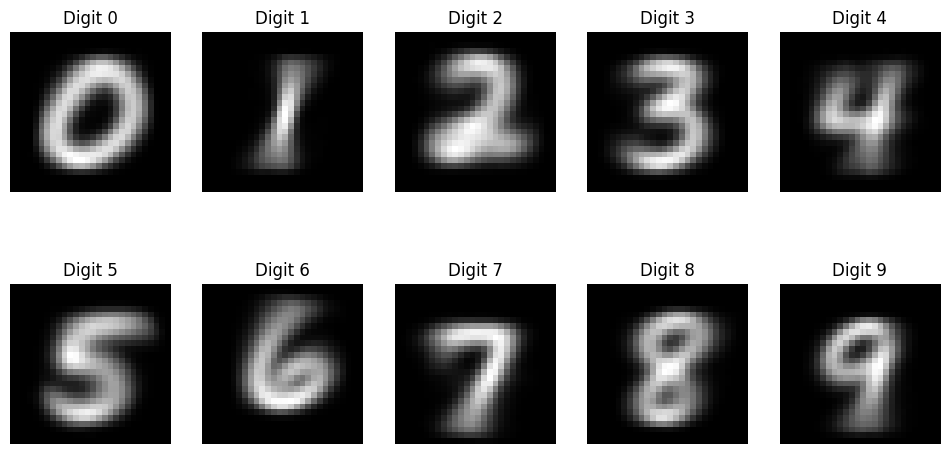

In [ ]:
# Get the mean image for each digit class
mean_images = []
for digit in range(10):
    # Filter out the images corresponding to the current digit
    digit_images = X_test[y_test_pred_knn == digit]
    mean_image = np.mean(digit_images, axis=0)
    # Reshape the mean image back to its original dimensions
    mean_image = mean_image.reshape(28, 28)
    mean_images.append(mean_image)

# Plot the mean images for each digit class
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(mean_images[i], cmap='gray')
    ax.set_title(f"Digit {i}")
    ax.axis('off')

plt.show()

In [ ]:
# Define the KNN classifier
np.random.seed(42)
knn_clf_grid = KNeighborsClassifier()

# Define the hyperparameters you want to tune and their possible values
param_grid = {
    'n_neighbors': [1,2,3,4,5],
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
    'weights':['uniform','distance']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_clf_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=10)

# Perform grid search with cross-validation and obtain predictions
#y_train_pred = cross_val_predict(grid_search, X_train, y_train, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_knn_clf = grid_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best score found
print("Best Cross Validation Accuracy for KNN Classifier after using GridSearchCV:", grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Fit the best KNN classifier (obtained from GridSearchCV) on the training data.
best_knn_clf.fit(X_train, y_train)
# Use the trained model to predict the labels of the test set.
y_test_pred_knn_grid = best_knn_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_knn_grid)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');
print("Accuracy on test dataset for KNN Classifier after using GridSearchCV:")
print(accuracy_score(y_test, y_test_pred_knn_grid))

In [ ]:
# Define the KNN classifier
np.random.seed(42)
knn_clf_rand = KNeighborsClassifier()

# Define the hyperparameters you want to tune and their possible values
param_dist = {
    'n_neighbors': [1,2,3,4,5],
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
    'weights':['uniform','distance']

}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(knn_clf_rand, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=10)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best estimator from random search
best_knn_clf = random_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Cross Validation Accuracy for KNN Classifier after using RandomizedSearchCV:", random_search.best_score_)


In [ ]:
# Fit the best KNN classifier (obtained from RandomizedSearchCV) on the training data.
best_knn_clf.fit(X_train, y_train)
# Use the trained model to predict the labels of the test set.
y_test_pred_knn_rand = best_knn_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_knn_rand)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');
print("Accuracy on test dataset for KNN Classifier after using RandomizedSearchCV:")
print(accuracy_score(y_test, y_test_pred_knn_rand))

# Neural Network Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
# Load the dataset
X_train1 = X_train_3D.reshape(60000, 784) / 255.0  # Flatten the images and scale pixel values
X_test1 = X_test_3D.reshape(10000, 784) / 255.0  # Flatten and scale

In [ ]:
# Initialize a MLP classifier with a specific random state for reproducibility
mlp_clf = MLPClassifier(random_state=42,hidden_layer_sizes=[500,])
y_train_pred = cross_val_predict(mlp_clf, X_train1, y_train, cv=5)   # 'cv=5' specifies 5-fold cross-validation
# Fit the MLP classifier to the training data.
mlp_clf.fit(X_train1, y_train)

MLPClassifier(hidden_layer_sizes=[500], random_state=42)

In [ ]:
# Evaluate the accuracy of the MLP classifier using 5-fold cross-validation.
# This will return an array of accuracy scores (one for each fold).
cross_val_acc=cross_val_score(mlp_clf, X_train1, y_train, cv=5, scoring="accuracy")
# Calculate the mean of the cross-validation accuracy scores to get an overall idea of the model's accuracy.
mean_cross_val_acc = np.mean(cross_val_acc)
print("Mean Cross-validation Accuracy for Neural Network Classifier:", mean_cross_val_acc)


Mean Cross-validation Accuracy for Neural Network Classifier: 0.9808333333333333


In [ ]:
mlp_clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Create a confusion matrix for cross validation prediction & actual labels

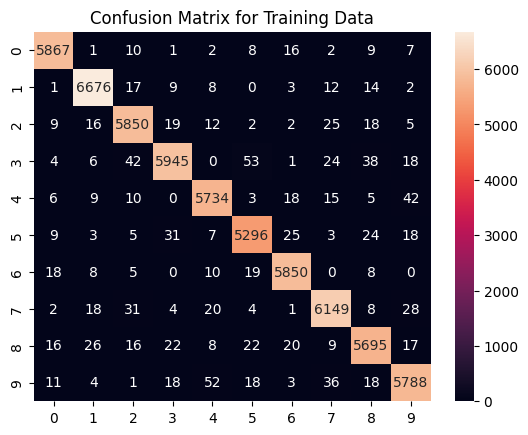

In [ ]:
# This matrix will show how well the model is predicting each class.
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
ax = sns.heatmap(confusion_matrix_train, annot=True, fmt='d')
ax.set_title('Confusion Matrix for Training Data');

Plot Confusion Matrix against Test data

Accuracy for test data MLP classifier
0.9804


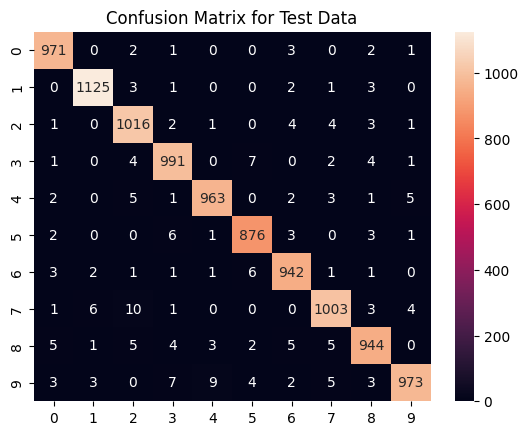

In [ ]:
# Use the trained MLP classifier to predict the labels for the test set.
from sklearn.metrics import accuracy_score
y_test_pred_mlp = mlp_clf.predict(X_test1)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred_mlp)
ax = sns.heatmap(confusion_matrix_test, annot=True, fmt='d')
ax.set_title('Confusion Matrix for Test Data');
print("Accuracy for test data MLP classifier")
print(accuracy_score(y_test,y_test_pred_mlp))

In [ ]:
report = classification_report(y_test, y_test_pred_mlp)     # This report includes key metrics such as precision, recall, f1-score and support for each class
print("Classification Report for Neural Network Classifier:")
print(report)

Classification Report for Neural Network Classifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# Get the mean image for each digit class
mean_images = []
for digit in range(10):
    # Filter out the images corresponding to the current digit
    digit_images = X_test[y_test_pred_mlp == digit]
    # Calculate the mean of the images
    mean_image = np.mean(digit_images, axis=0)
    # Reshape the mean image back to its original dimensions
    mean_image = mean_image.reshape(28, 28)
    mean_images.append(mean_image)

# Plot the mean images for each digit class
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(mean_images[i], cmap='gray')
    ax.set_title(f"Digit {i}")
    ax.axis('off')

plt.show()

In [ ]:
# Initialize the MLPClassifier
mlp_clf_grid = MLPClassifier(random_state=42)

# Define the hyperparameters you want to tune and their possible values
param_grid = {
    'hidden_layer_sizes': [(400,), (500,)],
    'alpha': [1, 0.1],
    'max_iter': [100, 200]

 # Adjust the values as needed
}

# Create the GridSearchCV object
grid_search = GridSearchCV(mlp_clf_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train1, y_train)

# Get the best estimator from grid search
best_mlp_clf = grid_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best score found
print("Best Cross Validation Accuracy for MLP Classifier after using GridSearchCV:", grid_search.best_score_)

In [ ]:
# Fit the best MLP classifier (obtained from GridSearchCV) on the training data.
best_mlp_clf.fit(X_train, y_train)
# Use the trained model to predict the labels of the test set.
y_test_pred_mlp_grid = best_knn_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_mlp_grid)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');
print("Accuracy on test dataset for MLP Classifier after using GridSearchCV:")
print(accuracy_score(y_test, y_test_pred_mlp_grid))

In [ ]:
# Initialize the MLPClassifier
mlp_clf_rand = MLPClassifier(random_state=42)

# Define the hyperparameters you want to tune and their possible values
param_dist = {
    'hidden_layer_sizes': [(400,), (500,)],
    'alpha': [1, 0.1],
    'max_iter': [100, 200]
}
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(mlp_clf_rand, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the randomized search to the training data
random_search.fit(X_train1, y_train)

# Get the best estimator from random search
best_mlp_clf = random_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Cross Validation Accuracy for MLP Classifier after using RandomizedSearchCV:", random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# Fit the best MLP classifier (obtained from RandomizedSearchCV) on the training data.
best_mlp_clf.fit(X_train, y_train)
# Use the trained model to predict the labels of the test set.
y_test_pred_mlp_rand = best_knn_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_mlp_rand)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');
print("Accuracy on test dataset for MLP Classifier after using RandomizedSearchCV:")
print(accuracy_score(y_test, y_test_pred_mlp_rand))

#Naïve Bayes Classifier


 # Gaussian Naïve Bayes Classifier



In [ ]:
from sklearn.naive_bayes import GaussianNB
# Initialize a GaussianNB classifier with a specific random state for reproducibility
np.random.seed(42)
nb_clf = GaussianNB()
y_train_pred = cross_val_predict(nb_clf, X_train, y_train, cv=5)   # 'cv=5' specifies 5-fold cross-validation

# Fit the GaussianNB classifier to the training data.
nb_clf.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Evaluate the accuracy of the GaussianNB classifier using 5-fold cross-validation.
# This will return an array of accuracy scores (one for each fold).
cross_val_acc = cross_val_score(nb_clf, X_train, y_train, cv=5, scoring="accuracy")
# Calculate the mean of the cross-validation accuracy scores to get an overall idea of the model's accuracy.
mean_cross_val_acc = np.mean(cross_val_acc)
print("Mean Cross-validation Accuracy:", mean_cross_val_acc)

Mean Cross-validation Accuracy: 0.5617666666666666


Create a confusion matrix for cross validation prediction & actual labels

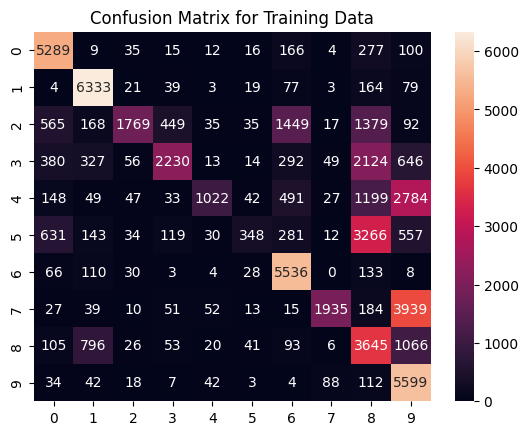

In [ ]:
confusionMatrix_train = confusion_matrix(y_train, y_train_pred)  # This matrix will show how well the model is predicting each class.
ax = sns.heatmap(confusionMatrix_train, annot=True, fmt='d')
ax.set_title('Confusion Matrix for Training Data');

Plot Confusion Matrix against Test data

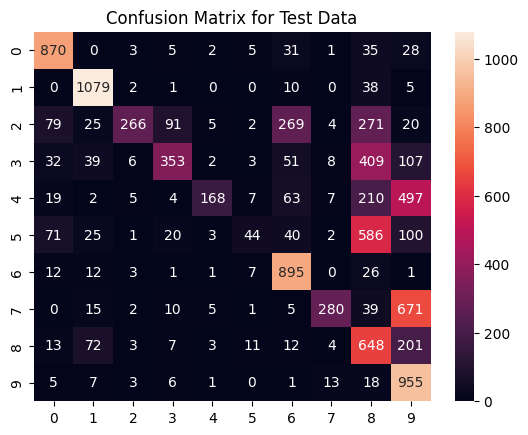

In [ ]:
# Use the trained GaussianNB classifier to predict the labels for the test set.
y_test_pred_nb = nb_clf.predict(X_test)
confusionMatrix_test = confusion_matrix(y_test, y_test_pred_nb)
ax = sns.heatmap(confusionMatrix_test, annot=True, fmt='d')
ax.set_title('Confusion Matrix for Test Data');

In [ ]:
report = classification_report(y_test, y_test_pred_nb)   # This report includes key metrics such as precision, recall, f1-score and support for each class
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



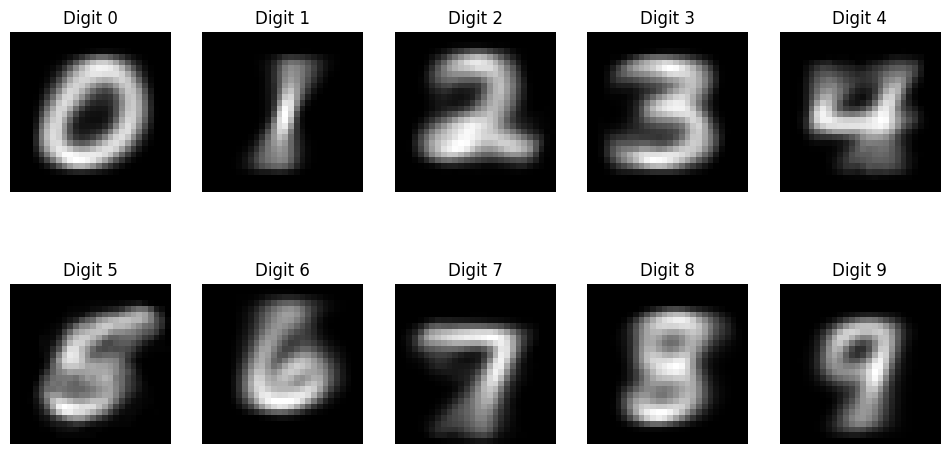

In [ ]:
# Get the mean image for each digit class
mean_images = []
for digit in range(10):
    # Filter out the images corresponding to the current digit
    digit_images = X_test[y_test_pred_nb == digit]
    mean_image = np.mean(digit_images, axis=0)
    # Reshape the mean image back to its original dimensions
    mean_image = mean_image.reshape(28, 28)
    mean_images.append(mean_image)

# Plot the mean images for each digit class
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(mean_images[i], cmap='gray')
    ax.set_title(f"Digit {i}")
    ax.axis('off')

plt.show()

In [ ]:
# Initialize the GaussianNB Classifier
np.random.seed(42)
nb_clf_grid = GaussianNB()

# Define the hyperparameters you want to tune and their possible values
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
# Create the GridSearchCV object
grid_search = GridSearchCV(nb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=10)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_nb_clf = grid_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best score found
print("Best Cross Validation Accuracy for GaussianNB Classifier after using GridSearchCV:", grid_search.best_score_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:
# Fit the best GaussianNB classifier (obtained from GridSearchCV) on the training data.
best_nb_clf.fit(X_train, y_train)
# Use the trained model to predict the labels of the test set.
y_test_pred_nb_grid = best_nb_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_nb_grid)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');
print("Accuracy on test dataset for GaussianNB Classifier after using GridSearchCV:")
print(accuracy_score(y_test, y_test_pred_nb_grid))

In [ ]:
# Initialize the GaussianNB Classifier
np.random.seed(42)
nb_clf_rand = GaussianNB()

# Define the hyperparameters you want to tune and their possible values
param_dist = {'var_smoothing': np.logspace(0,-9, num=100)}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(nb_clf_rand, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=10)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best estimator from random search
best_nb_clf = random_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Cross Validation Accuracy for GaussianNB Classifier after using RandomizedSearchCV:", random_search.best_score_)



In [ ]:
# Fit the best GaussianNB classifier (obtained from RandomizedSearchCV) on the training data.
best_nb_clf.fit(X_train, y_train)
# Use the trained model to predict the labels of the test set.
y_test_pred_nb_rand = best_nb_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_nb_rand)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');
print("Accuracy on test dataset for GaussianNB Classifier after using RandomizedSearchCV:")
print(accuracy_score(y_test, y_test_pred_nb_rand))

   # Bernoulli Naïve Bayes Classifier

In [ ]:
from sklearn.naive_bayes import BernoulliNB
# Initialize a BernoulliNB classifier with a specific random state for reproducibility
br_clf = BernoulliNB(random_state=42)
y_train_pred = cross_val_predict(br_clf, X_train, y_train, cv=5)    # 'cv=5' specifies 5-fold cross-validation
# Fit the BernoulliNB classifier to the training data.
br_clf.fit(X_train, y_train)


In [ ]:
# Evaluate the accuracy of the BernoulliNB classifier using 5-fold cross-validation.
# This will return an array of accuracy scores (one for each fold).
cross_val_acc = cross_val_score(br_clf, X_train, y_train, cv=5, scoring="accuracy")
# Calculate the mean of the cross-validation accuracy scores to get an overall idea of the model's accuracy.
mean_cross_val_acc = np.mean(cross_val_acc)
print("Mean Cross-validation Accuracy:", mean_cross_val_acc)

Create a confusion matrix for cross validation prediction & actual labels

In [ ]:
confusionMatrix_train = confusion_matrix(y_train, y_train_pred)    # This matrix will show how well the model is predicting each class.
ax = sns.heatmap(confusionMatrix_train, annot=True, fmt='d')
ax.set_title('Confusion Matrix for Training Data');

Plot Confusion Matrix against Test data

In [ ]:
# Use the trained BernoulliNB classifier to predict the labels for the test set.
y_test_pred_br = br_clf.predict(X_test)
confusionMatrix_test = confusion_matrix(y_test, y_test_pred_br)
ax = sns.heatmap(confusionMatrix_test, annot=True, fmt='d')
ax.set_title('Confusion Matrix for Test Data');

In [ ]:
report = classification_report(y_test, y_test_pred_br)  # This report includes key metrics such as precision, recall, f1-score and support for each class
print("Classification Report:")
print(report)

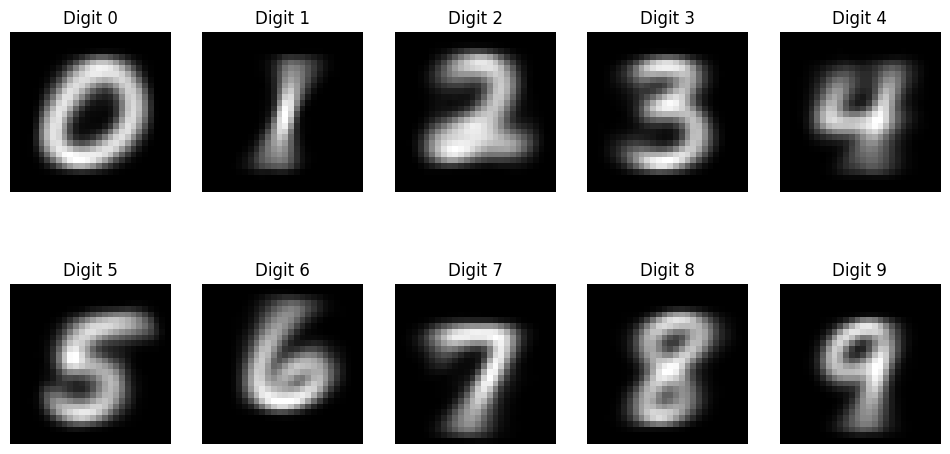

In [ ]:
# Get the mean image for each digit class
mean_images = []
for digit in range(10):
    # Filter out the images corresponding to the current digit
    digit_images = X_test[y_test_pred_br == digit]
    mean_image = np.mean(digit_images, axis=0)
    # Reshape the mean image back to its original dimensions
    mean_image = mean_image.reshape(28, 28)
    mean_images.append(mean_image)

# Plot the mean images for each digit class
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(mean_images[i], cmap='gray')
    ax.set_title(f"Digit {i}")
    ax.axis('off')

plt.show()

In [ ]:
# Initialize the BernoulliNB Classifier
ber_clf_grid = BernoulliNB(random_state=42)

# Define the hyperparameters you want to tune and their possible values
param_grid={'alpha': [1e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0,2.0, 10.0]}
# Create the GridSearchCV object
grid_search = GridSearchCV(ber_clf_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=10)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_ber_clf = grid_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best score found
print("Best Cross Validation Accuracy for BernoulliNB Classifier after using GridSearchCV:", grid_search.best_score_)

In [ ]:
# Fit the best BernoulliNB classifier (obtained from GridSearchCV) on the training data.
best_ber_clf.fit(X_train, y_train)
# Use the trained model to predict the labels of the test set.
y_test_pred_ber_grid = best_ber_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_ber_grid)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');
print("Accuracy on test dataset for BernoulliNB Classifier after using GridSearchCV:")
print(accuracy_score(y_test, y_test_pred_ber_grid))

In [ ]:
# Initialize the BernoulliNB Classifier
ber_clf_rand = BernoulliNB(random_state=42)

# Define the hyperparameters you want to tune and their possible values
param_grid={'alpha': [1e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0,2.0, 10.0]}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(ber_clf_rand, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=10)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best estimator from random search
best_ber_clf = random_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Cross Validation Accuracy for BernoulliNB Classifier after using RandomizedSearchCV:", random_search.best_score_)



Accuracy on test dataset for BernoulliNB Classifier after using RandomizedSearchCV:
0.8419


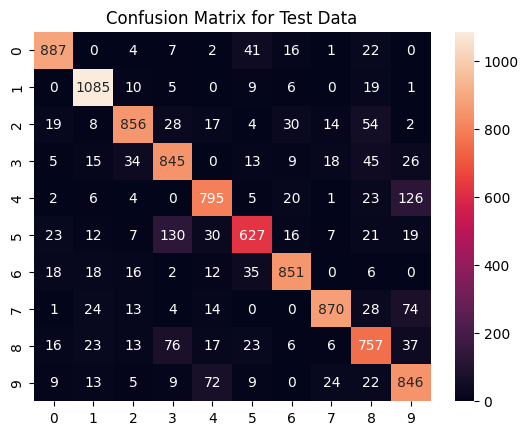

In [ ]:
# Fit the best Bernoulli classifier (obtained from RandomizedSearchCV) on the training data.
best_ber_clf.fit(X_train, y_train)
# Use the trained model to predict the labels of the test set.
y_test_pred_ber_rand = best_ber_clf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_test_pred_ber_rand)
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')
ax.set_title('Confusion Matrix for Test Data');
print("Accuracy on test dataset for BernoulliNB Classifier after using RandomizedSearchCV:")
print(accuracy_score(y_test, y_test_pred_ber_rand))